# Desafio 8

Neste desafio, vamos praticar _modelagem de predição de dados_, com base no _data set_ do ENEM 2016, disponibilizado pela Codenation. Para isso será usado Python, Pandas, Sklearn e Regressão Linear.

Ao final será criado um arquivo chamado answer.csv contendo duas colunas: **NU_INSCRICAO** e **NU_NOTA_MT**

## Setup geral

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [223]:
enem = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [224]:
colunas = list(teste.columns)
colunas.append('NU_NOTA_MT')
enem = enem[colunas]

In [225]:
enem.isnull().sum().sort_values(ascending = False)

TP_DEPENDENCIA_ADM_ESC    9448
TP_ENSINO                 9448
Q027                      7373
NU_NOTA_MT                3597
NU_NOTA_COMP5             3597
NU_NOTA_LC                3597
TP_STATUS_REDACAO         3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_COMP1             3597
NU_NOTA_REDACAO           3597
NU_NOTA_CH                3389
NU_NOTA_CN                3389
TP_ESCOLA                    0
IN_SURDEZ                    0
IN_CEGUEIRA                  0
IN_BAIXA_VISAO               0
CO_UF_RESIDENCIA             0
IN_TREINEIRO                 0
SG_UF_RESIDENCIA             0
TP_ANO_CONCLUIU              0
TP_NACIONALIDADE             0
NU_IDADE                     0
TP_ST_CONCLUSAO              0
TP_SEXO                      0
IN_DISCALCULIA               0
TP_COR_RACA                  0
IN_DISLEXIA                  0
TP_PRESENCA_LC               0
IN_SABATISTA                 0
IN_GESTANTE                  0
Q026    

In [65]:
enem.dtypes

NU_INSCRICAO               object
CO_UF_RESIDENCIA            int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
TP_SEXO                    object
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
TP_DEPENDENCIA_ADM_ESC    float64
IN_BAIXA_VISAO              int64
IN_CEGUEIRA                 int64
IN_SURDEZ                   int64
IN_DISLEXIA                 int64
IN_DISCALCULIA              int64
IN_SABATISTA                int64
IN_GESTANTE                 int64
IN_IDOSO                    int64
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
CO_PROVA_CN                object
CO_PROVA_CH                object
CO_PROVA_LC                object
CO_PROVA_MT                object
NU_NOTA_CN                float64
NU_NOTA_CH    

In [226]:
enem_num = enem.select_dtypes(exclude = 'object').columns
teste_num = teste.select_dtypes(exclude = 'object').columns

In [227]:
enem[enem_num] = enem.loc[:,enem_num].fillna(0)
teste[teste_num] = teste.loc[:,teste_num].fillna(0)

enem = enem.fillna(0)
teste = teste.fillna(0)

In [228]:
teste.isnull().values.any()

False

In [229]:
inscricao_enem = enem['NU_INSCRICAO']
inscricao_teste = teste['NU_INSCRICAO']
nota = enem['NU_NOTA_MT']

enem = enem.iloc[:,1:-1]
teste = teste.iloc[:, 1:]

In [230]:
dummies = pd.get_dummies(enem.append(teste))
dummies

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,Q027_I,Q027_J,Q027_K,Q027_L,Q027_M,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,43,24,1,1,1,4,1,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,23,17,3,1,2,0,2,1.0,0,2.0,...,0,0,0,0,0,1,0,0,0,0
2,23,21,3,1,3,0,1,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,33,25,0,1,1,9,1,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,13,28,2,1,1,4,1,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
5,29,18,1,1,1,1,1,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
6,51,18,3,1,2,0,2,1.0,0,2.0,...,0,0,0,0,0,1,0,0,0,0
7,43,18,1,1,1,1,1,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
8,26,16,3,1,2,0,2,1.0,0,2.0,...,0,0,0,0,0,1,0,0,0,0
9,31,24,4,2,4,0,1,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [231]:
enem_length = len(enem)

enem = dummies.iloc[:enem_length]
teste = dummies.iloc[enem_length:]

enem['NU_NOTA_MT'] = nota
enem['NU_INSCRICAO'] = inscricao_enem
teste['NU_INSCRICAO'] = inscricao_teste

/home/pherris/anaconda3/envs/aceleradev_ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/pherris/anaconda3/envs/aceleradev_ds/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/pherris/anaconda3/envs/aceleradev_ds/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [232]:
rf = RandomForestRegressor()

In [233]:
X = enem.drop(['NU_NOTA_MT', 'NU_INSCRICAO'], 1)
y = enem['NU_NOTA_MT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [234]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [235]:
pred = rf.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, pred))}')

RMSE: 62.036238021605705


In [236]:
rf.score(X_test, y_test)

0.9282151423359855

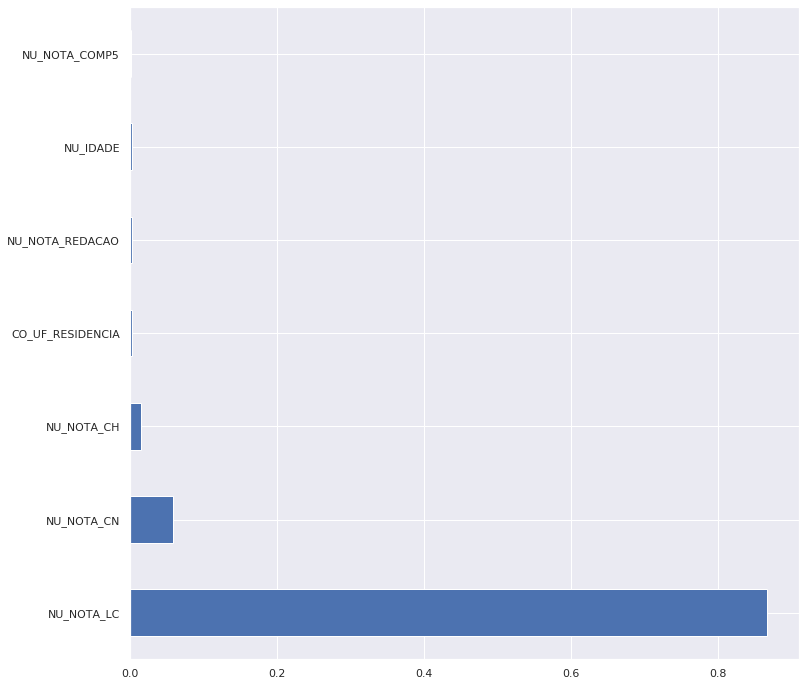

In [237]:
feat_importances = pd.Series(rf.feature_importances_, index= X.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [238]:
features = feat_importances.sort_values(ascending = False)[:10].index

In [239]:
X = enem[features]
rf.fit(X,y)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, pred))}')

RMSE: 62.036238021605705


In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
rf.score(X_test, y_test)

0.9892630077072467

In [241]:
sub = rf.predict(teste[features])

In [242]:
sub.shape

(4576,)

In [243]:
submit = pd.Series(sub, index=teste['NU_INSCRICAO'], name='NU_NOTA_MT')
submit.to_csv("answer.csv", header=True)